In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

**Pair Programming EDA III**

Hip√≥tesis:

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro an√°lisis:

- ¬øEs Australia es el sitio m√°s peligroso y letal para estar relajada en la playa?

- ¬øHay diferencias entre los paises en los ataques a hombres y mujeres?

- ¬øCu√°les son las edades que m√°s sufren ataques?

- Independientemente de la edad, sufren los hombres m√°s ataques que las mujeres?

- ¬øEn qu√© mes ocurren m√°s ataques?

- ¬øCu√°l es la relaci√≥n entre la especie y el tipo de ataque (si es fatal o no)?

- ¬øC√≥mo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla.

In [28]:
df = pd.read_csv("datos/limpieza_dos.csv", index_col=0)
df.head()

YEAR    COUNTRY SEX_ AGE          SPECIES_ fecha FATALIDAD nueva_especie  \
0  2018        usa    F  57       White shark   NaN         N         White   
1  2018     brazil    M  18       Tiger shark   NaN         N         Tiger   
2  2018        usa    M  15    Bull shark, 6'   NaN         N          Bull   
3  2018  australia    M  32   Grey reef shark   NaN         N          Grey   
4  2018    england    M  21  Invalid incident   NaN         N   Desconocido   

   edad_limpia  
0         57.0  
1         18.0  
2         15.0  
3         32.0  
4         21.0

Objetivos:

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

üìå Nota Como siempre, despu√©s de cada gr√°fica incluid una peque√±a explicaci√≥n de lo que nos est√° mostrando la gr√°fica.

1. Estableced el tama√±o de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [29]:
# establecer el tama√±o nuestras figuras
plt.rcParams["figure.figsize"] = (7,5)

# en esta lecci√≥n nos van a salir muchos warning al hacer las gr√°ficas. Para evitar que nos salgan todo el rato podemos ejecutar las siguientes lineas de c√≥digo
import warnings
warnings.filterwarnings('ignore')

2. Manos a la obra con los plots, estos ir√°n muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximaci√≥n a nuestras hip√≥tesis:

- ¬øCu√°ntos ataques hubo por pais? ¬øSe puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con m√°s ataques y volved a hacer el plot.

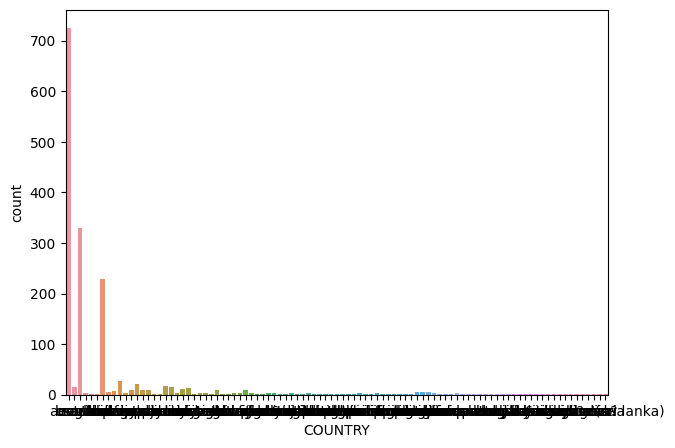

In [30]:
sns.countplot(x = "COUNTRY", data = df); 
plt.show(); 

In [ ]:
# No se puede ver nada en esta gr√°fica por el gran n√∫mero de paises que han sufrido ataques.
# Vamos a seleccionar los 10 paises con mas ataques.

In [31]:
paises_mas_ataques = df.stb.freq(["COUNTRY"])
diez_paises = paises_mas_ataques.head(10)
diez_paises

COUNTRY  count    percent  cumulative_count  cumulative_percent
0               usa    725  44.975186               725           44.975186
1         australia    329  20.409429              1054           65.384615
2      south africa    228  14.143921              1282           79.528536
3           bahamas     27   1.674938              1309           81.203474
4       new zealand     21   1.302730              1330           82.506203
5           reunion     17   1.054591              1347           83.560794
6            brazil     16   0.992556              1363           84.553350
7            mexico     15   0.930521              1378           85.483871
8  papua new guinea     14   0.868486              1392           86.352357
9             italy     11   0.682382              1403           87.034739

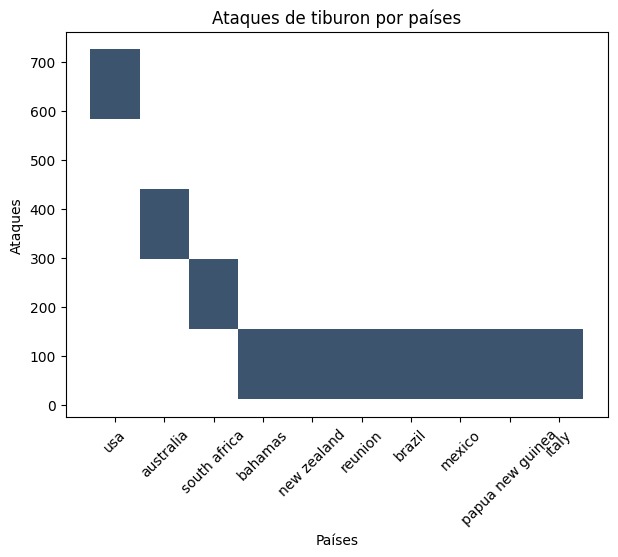

In [111]:
fig=sns.histplot(x= "COUNTRY", y='count', data = diez_paises)   
plt.title('Ataques de tiburon por pa√≠ses')
fig.set(ylabel='Ataques', xlabel= 'Pa√≠ses')
plt.xticks(rotation=45);


- Usando el DataFrame de los 10 paises con m√°s ataques.

In [33]:
lista_diez_paises = diez_paises["COUNTRY"].values
lista_diez_paises

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'mexico', 'papua new guinea', 'italy'],
      dtype=object)

In [34]:
df_diez_paises= df[df["COUNTRY"].isin(lista_diez_paises)]
df_diez_paises

YEAR           COUNTRY SEX_  AGE         SPECIES_ fecha FATALIDAD  \
0     2018               usa    F   57      White shark   NaN         N   
1     2018            brazil    M   18      Tiger shark   NaN         N   
2     2018               usa    M   15   Bull shark, 6'   NaN         N   
3     2018         australia    M   32  Grey reef shark   NaN         N   
6     2018         australia    M   60        3 m shark   NaN         N   
...    ...               ...  ...  ...              ...   ...       ...   
1641     0  papua new guinea  NaN  NaN              NaN   NaN         N   
1644     0             italy  NaN  NaN              NaN   NaN         N   
1647     0         australia  NaN  NaN              NaN   NaN       NaN   
1648     0           reunion  NaN  NaN              NaN   NaN         Y   
1649     0      south africa  NaN  NaN              NaN   NaN         N   

     nueva_especie  edad_limpia  
0            White         57.0  
1            Tiger         18.0  
2             Bull         15.0  
3             Grey         32.0  
6      Desconocido         60.0  
...            ...          ...  
1641   Desconocido          NaN  
1644   Desconocido          NaN  
1647   Desconocido          NaN  
1648   Desconocido          NaN  
1649   Desconocido          NaN  

[1403 rows x 9 columns]

¬øhay diferencias entre sexos en esos paises?

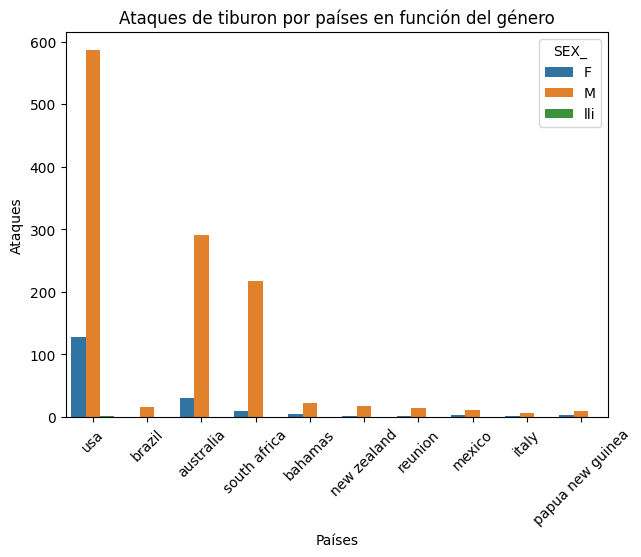

In [105]:
fig=sns.countplot(x= "COUNTRY", data = df_diez_paises,  hue= "SEX_")   
plt.title('Ataques de tiburon por pa√≠ses en funci√≥n del g√©nero')
fig.set(ylabel='Ataques', xlabel= 'Pa√≠ses')
plt.xticks(rotation=45);

In [ ]:
# Hay diferencia entre sexos en los ataques siendo los hombres m√°s atacados que las mujeres.
# En el caso de Estados Unidos 

¬øQu√© edad recibe mayor n√∫mero de ataques?

üí° Pista üí° Para que esta gr√°fica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el m√©todo pd.cut() que aprendimos en la lecci√≥n de Limpieza II.

In [36]:
df_diez_paises.head(1)

YEAR COUNTRY SEX_ AGE     SPECIES_ fecha FATALIDAD nueva_especie  \
0  2018     usa    F  57  White shark   NaN         N         White   

   edad_limpia  
0         57.0

In [37]:
df_diez_paises["edad_limpia"].dtype

dtype('float64')

In [38]:
df_diez_paises["edad_limpia"].dropna(how=any, inplace=True)

In [39]:
df_diez_paises["edad_limpia"].unique

<bound method Series.unique of 0       57.0
1       18.0
2       15.0
3       32.0
6       60.0
        ... 
1641     NaN
1644     NaN
1647     NaN
1648     NaN
1649     NaN
Name: edad_limpia, Length: 1403, dtype: float64>

In [40]:
df_diez_paises["edad_limpia"].astype(int, errors='ignore')

0       57.0
1       18.0
2       15.0
3       32.0
6       60.0
        ... 
1641     NaN
1644     NaN
1647     NaN
1648     NaN
1649     NaN
Name: edad_limpia, Length: 1403, dtype: float64

In [44]:
df_diez_paises["edad_limpia"].dtypes

dtype('float64')

In [45]:
df_diez_paises ["rangos"] = pd.cut(df_diez_paises["edad_limpia"], 3, labels = ["JOVENES", "ADULTOS", "ANCIANOS"])

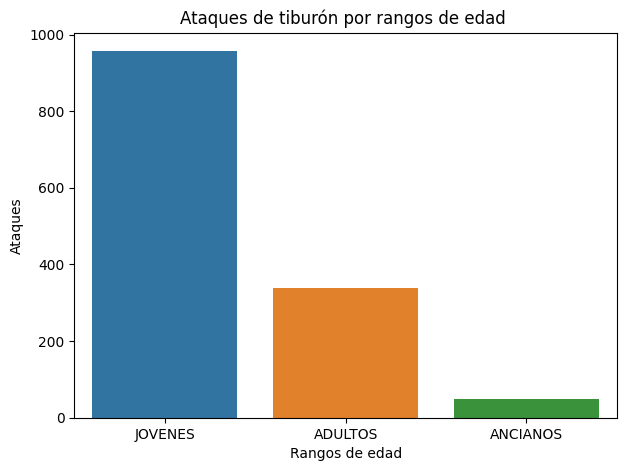

In [104]:
fig= sns.countplot(x=df_diez_paises ["rangos"])
fig.set(ylabel='Ataques', xlabel= 'Rangos de edad')
plt.title('Ataques de tibur√≥n por rangos de edad ');

In [ ]:
#la gran mayor√≠a de ataques de tiburon registrados se han producido a personas jovenes
# y una minima parte a ancianos

- Ataques entre sexos, ¬øhay diferencia?

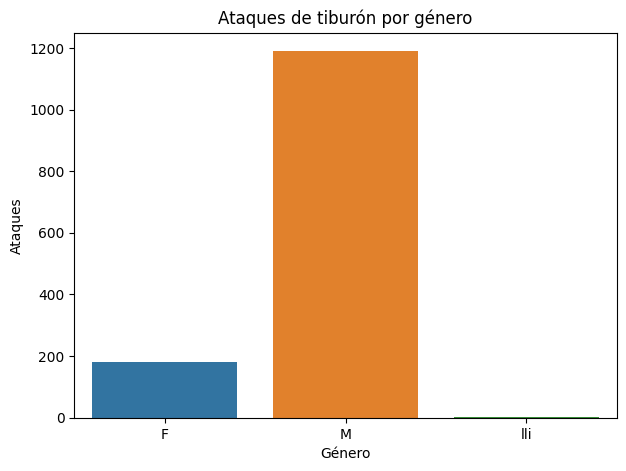

In [102]:
fig= sns.countplot(x=df_diez_paises['SEX_'])
fig.set(ylabel='Ataques', xlabel= 'G√©nero')
plt.title('Ataques de tibur√≥n por g√©nero');

In [ ]:
#la inmensa mayor√≠a de ataques registrados han sido a hombres

- ¬øCuando ocurren m√°s ataques? ¬øOs sale algo raro en la gr√°fica? Intentad limpiar un poco los datos para que os salga mejor.

In [74]:
df_diez_paises['YEAR'].value_counts().index

Int64Index([2015, 2012, 2007, 2002, 2003, 2013, 2005, 2006, 2004, 2008,
            ...
            1906, 1912, 1943, 1919, 1970, 1924, 1944, 1945, 1948, 1916],
           dtype='int64', length=116)

In [93]:
df1= df_diez_paises[df_diez_paises ["YEAR"] >1980]

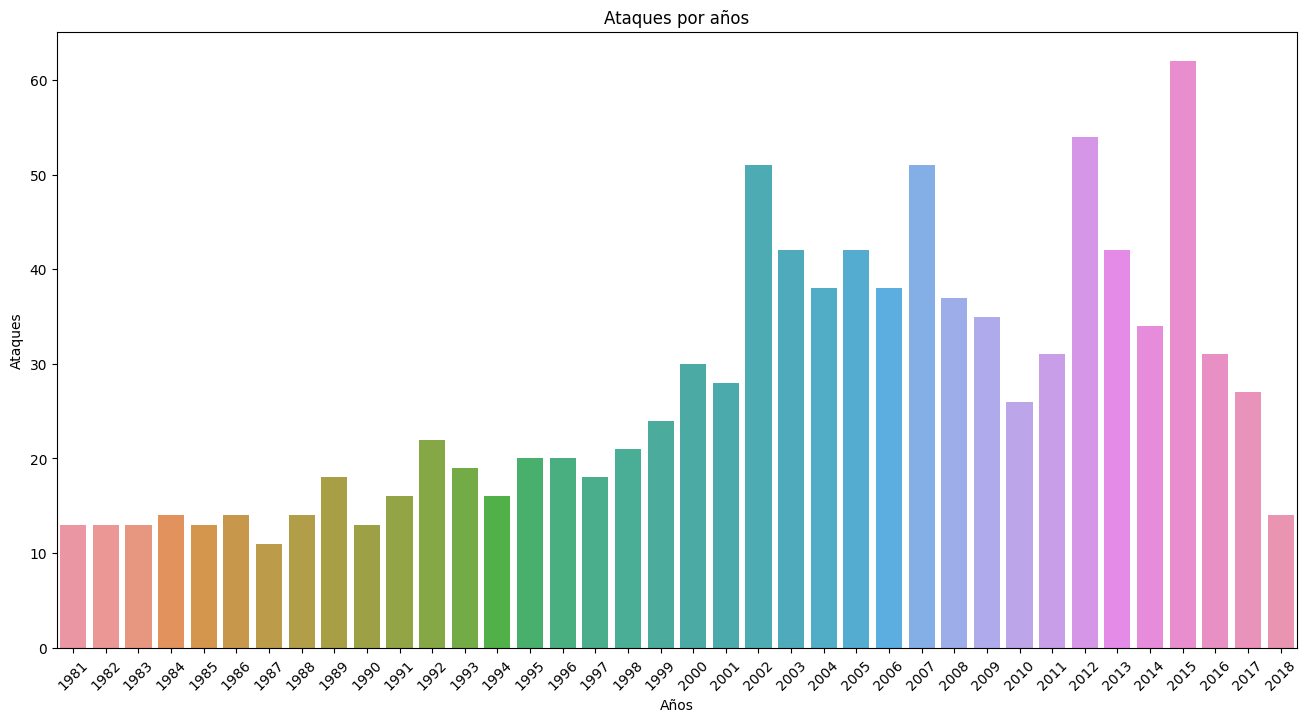

In [106]:
plt.figure(figsize =(16,8))
fig=sns.countplot(data=df1, x='YEAR')
plt.xticks(rotation=45)
fig.set(ylabel='Ataques', xlabel= 'A√±os')
plt.title('Ataques por a√±os');

Podr√≠amos hacer m√°s gr√°ficas para seguir explorando nuestras hip√≥tesis, pero tenemos el tiempo limitado üò¢. A√∫n as√≠, sentiros libres de explorar todo lo que quer√°is vuestros datos para entenderlos mejor üòâ.